In [22]:
import numpy as np
from metaheuristicas import KnapsackProblem, ILS

turno_minutos = 480
tempo_processamento_max = 90
lucro_max = 5000
qntd_itens = 500

def get_dict_producao(qntd_itens: int) -> dict:
    np.random.seed(42)
    dict_producao = {}

    for i in range(1, qntd_itens + 1):

        dict_producao[f'OP_{i:03d}'] = {
            'tempo_processamento' : int(np.random.randint(5, tempo_processamento_max)),
            'lucro' : int(np.random.randint(1000, lucro_max))
        }

    return dict_producao

ordens_producao = get_dict_producao(qntd_itens)

In [23]:
taxa_de_violacao = 2000

ils = ILS(itens=ordens_producao, 
          capacidade=turno_minutos, 
          interacoes=5000, 
          taxa_violacao=taxa_de_violacao, 
          nivel_perturbacao=4,
          limite_sem_melhora=500,
          seed = 10,
          str_peso="tempo_processamento",
          str_valor="lucro")

In [24]:
# Solução gulosa por menor tempo de processamento

ils.solucao_gulosa(tipo_solucao="tempo_processamento")

Adicionando OP_423 (tempo_processamento: 5 | lucro: 1050) | Total atual: 5

Adicionando OP_412 (tempo_processamento: 5 | lucro: 1404) | Total atual: 10

Adicionando OP_275 (tempo_processamento: 5 | lucro: 2015) | Total atual: 15

Adicionando OP_249 (tempo_processamento: 5 | lucro: 2081) | Total atual: 20

Adicionando OP_378 (tempo_processamento: 5 | lucro: 2396) | Total atual: 25

Adicionando OP_098 (tempo_processamento: 5 | lucro: 2400) | Total atual: 30

Adicionando OP_143 (tempo_processamento: 5 | lucro: 2802) | Total atual: 35

Adicionando OP_057 (tempo_processamento: 5 | lucro: 3027) | Total atual: 40

Adicionando OP_488 (tempo_processamento: 5 | lucro: 3055) | Total atual: 45

Adicionando OP_253 (tempo_processamento: 5 | lucro: 4343) | Total atual: 50

Adicionando OP_119 (tempo_processamento: 5 | lucro: 4474) | Total atual: 55

Adicionando OP_250 (tempo_processamento: 5 | lucro: 4822) | Total atual: 60

Adicionando OP_494 (tempo_processamento: 6 | lucro: 1364) | Total atual: 66



(178069, 478)

In [25]:
# Solução gulosa por maior lucro

ils.solucao_gulosa(tipo_solucao="lucro")

Adicionando OP_481 (tempo_processamento: 49 | lucro: 4994) | Total atual: 49

Adicionando OP_159 (tempo_processamento: 37 | lucro: 4991) | Total atual: 86

Adicionando OP_172 (tempo_processamento: 52 | lucro: 4987) | Total atual: 138

Adicionando OP_438 (tempo_processamento: 89 | lucro: 4981) | Total atual: 227

Adicionando OP_292 (tempo_processamento: 50 | lucro: 4969) | Total atual: 277

Adicionando OP_431 (tempo_processamento: 7 | lucro: 4962) | Total atual: 284

Adicionando OP_379 (tempo_processamento: 58 | lucro: 4957) | Total atual: 342

Adicionando OP_044 (tempo_processamento: 18 | lucro: 4934) | Total atual: 360

Adicionando OP_055 (tempo_processamento: 69 | lucro: 4928) | Total atual: 429

Adicionando OP_288 (tempo_processamento: 44 | lucro: 4913) | Total atual: 473

Adicionando OP_074 (tempo_processamento: 7 | lucro: 4840) | Total atual: 480

[Guloso (Lucro)] Valor Final: 54456 | Peso Usado: 480


(54456, 480)

In [26]:
# Solução gulosa por maior densidade de lucro

# ils.solucao_gulosa(tipo_solucao="densidade")

In [27]:
melhor_sol, maior_lucro = ils.executar_ils(tipo_solucao_inicial="tempo_processamento")

# Analisar Resultado
nomes_escolhidos = ils.desbinarizar_solucao(melhor_sol)
lucro_final, tempo_final, _ = ils.avaliar_solucao(melhor_sol, taxa_de_violacao)
print(f"\nRESULTADO FINAL:")
print(f"Itens Produzidos: {len(nomes_escolhidos)} de {qntd_itens}")
print(f"Tempo Utilizado:  {tempo_final}min ({(tempo_final/turno_minutos)*100:.1f}%)")
print(f"Lucro Total:      R$ {lucro_final:.2f}")
print(f"\n{'Solução Inválida!' if tempo_final > turno_minutos else 'Solução Válida!'}")

--- Iniciando ILS (Capacidade: 480) ---
Solução Inicial Gerada: 178069

[Busca Local] Nenhuma melhora. Avaliação: 178069

Solução Inicial (pós busca local): 178069
[Busca Local] 1 passo realizado: 31378 -> 130706

[Busca Local] 1 passo realizado: 98552 -> 173225

[Busca Local] 1 passo realizado: -66492 -> 99552

[Busca Local] 1 passo realizado: 19743 -> 148009

[Busca Local] 1 passo realizado: -32245 -> 96412

[Busca Local] 1 passo realizado: 16610 -> 152533

[Busca Local] 1 passo realizado: 103936 -> 167877

[Busca Local] 1 passo realizado: 42597 -> 163623

[Busca Local] 1 passo realizado: -23061 -> 132291

[Busca Local] 1 passo realizado: 42427 -> 160409

[Busca Local] 1 passo realizado: 14138 -> 124890

[Busca Local] 1 passo realizado: -16480 -> 96306

[Busca Local] 1 passo realizado: -101706 -> 52341

[Busca Local] 1 passo realizado: 56216 -> 148439

[Busca Local] 1 passo realizado: -17826 -> 146155

[Busca Local] 1 passo realizado: 25150 -> 168923

[Busca Local] 1 passo realizado:

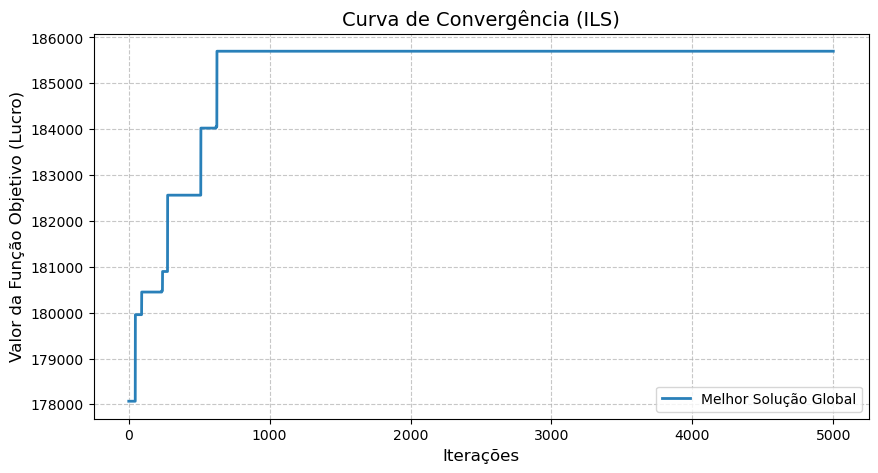

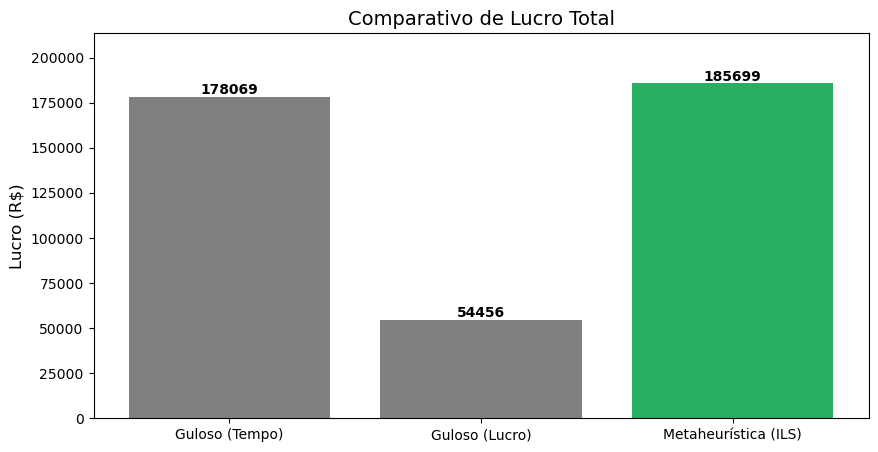

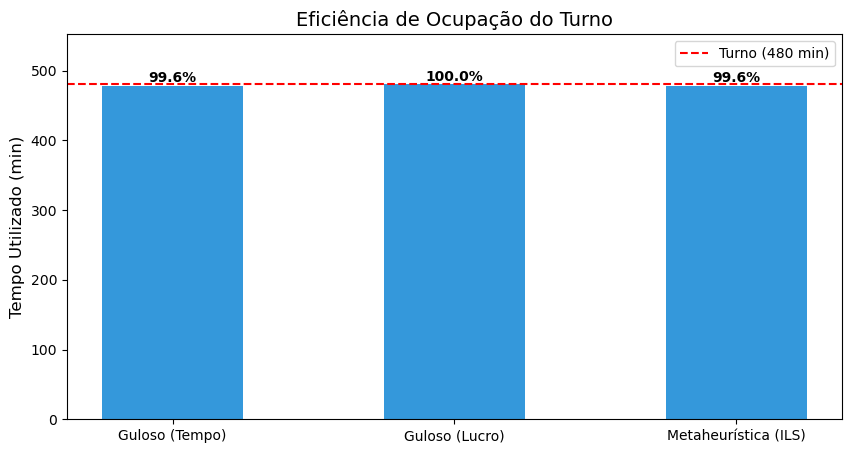

In [28]:
ils.plotar_convergencia()
ils.plotar_comparativo_lucro()
ils.plotar_eficiencia_tempo()